In [1]:
# importing libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import csv
import os
from time import time
from time import sleep

# connecting to Coinmarketcap API

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

# Fetching data from api
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



#This allows you to see all the columns, not just like 10-15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

StatementMeta(, , , Cancelled, )

In [3]:
# Writing an auto fetch function for fetching data

def auto_fetch():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
  #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'10',
    'convert':'USD'
    }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  #This allows you to see all the columns, not just like 10-15
  pd.set_option('display.max_columns', None)
  #pd.set_option('display.max_rows', None)

  #This normalizes the data and makes it all pretty in a dataframe

  df2 = pd.json_normalize(data['data'])

  df2['timestamp'] = pd.to_datetime('now')

  df = df.append(df2)

  # if not os.path.isfile(r'C:\Users\brain\Azure Project\autofetch.csv'):
  #   df.to_csv(r'C:\Users\brain\Azure Project\autofetch.csv', header='column_names')
  # else:
  #   df.to_csv(r'C:\Users\brain\Azure Project\autofetch.csv', mode='a', header=False)



StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 8, Finished, Available)

In [4]:
# Fetching Crypto data every minute

for i in range(300):
    auto_fetch()
    print('Fetching data through API completed')
    sleep(60) #Fetching data every minute
exit()


StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 9, Cancelled, Waiting)

Fetching data through API completed
Fetching data through API completed
Fetching data through API completed
Fetching data through API completed
Fetching data through API completed
Fetching data through API completed


In [5]:
df

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 10, Finished, Available)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951771e+07,1.951771e+07,False,NaN,1,NaN,NaN,None,2023-10-19T01:26:00.000Z,28379.319930,1.271216e+10,-11.2862,0.091885,0.082761,6.074173,6.159055,8.812658,-5.005580,5.538992e+11,51.1156,5.959657e+11,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
1,1027,Ethereum,ETH,ethereum,7569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202623e+08,1.202623e+08,True,NaN,2,NaN,NaN,None,2023-10-19T01:26:00.000Z,1565.134046,4.326958e+09,-11.6654,-0.024663,-0.078394,0.397698,-4.145010,-6.073878,-17.416954,1.882266e+11,17.3719,1.882266e+11,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
2,825,Tether USDt,USDT,tether,63992,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.381488e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-19T01:26:00.000Z,1.000238,3.198289e+10,-14.1757,-0.001721,-0.017359,0.029853,-0.009105,0.016459,0.032030,8.383482e+10,7.7373,8.664627e+10,None,2023-10-19T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-19 01:28:44.812276
3,1839,BNB,BNB,bnb,1689,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517055e+08,1.517055e+08,False,NaN,4,NaN,NaN,None,2023-10-19T01:26:00.000Z,210.672703,2.762166e+08,-20.2694,0.103102,-0.309214,2.687252,-2.585136,-2.817877,-13.543312,3.196021e+10,2.9497,3.196021e+10,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
4,52,XRP,XRP,xrp,1117,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-19T01:26:00.000Z,0.488082,7.217052e+08,-6.1184,-0.060337,-0.270903,0.643803,-2.953087,-5.964563,-38.574267,2.608360e+10,2.4073,4.880820e+10,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3408,USDC,USDC,usd-coin,14516,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.536666e+10,2.536666e+10,False,NaN,6,NaN,NaN,None,2023-10-19T01:32:00.000Z,1.000009,2.606239e+09,-6.1975,-0.008599,-0.014394,0.007443,-0.006993,-0.005129,-0.005736,2.536689e+10,2.3413,2.536689e+10,None,2023-10-19T01:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-19 01:33:59.937082
6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.164750e+08,5.602064e+08,True,NaN,7,NaN,NaN,None,2023-10-19T01:32:00.000Z,23.496369,3.571250e+08,-29.7153,-0.051219,-1.897283,8.011396,18.583261,7.787797,-7.559508,9.785650e+09,0.9030,1.316282e+10,None,2023-10-19T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:33:59.937082
7,2010,Cardano,ADA,cardano,947,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521860e+10,3.627473e+10,False,NaN,8,NaN,NaN,None,2023-10-19T01:32:00.000Z,0.244049,1.088455e+08,-15.7155,0.143997,-0.841270,-0.894207,-3.042801,-8.890494,-22.818456,8.595069e+09,0.7931,1.098221e+10,None,2023-10-19T01:32:00.000Z,NaN,N

In [6]:
# Storing raw data in dataset
from azureml.core import Workspace, Datastore, Dataset

# Specifying Azure Machine Learning workspace
subscription_id = '027643ef-e8cb-46b4-94f2-8544da081a79'
workspace_name = 'FirstCrypto'
resource_group = 'FirstCrypto'

ws = Workspace(subscription_id=subscription_id, resource_group=resource_group, workspace_name=workspace_name)
# Converting DataFrame to a TabularDataset
dataset_name = 'crypto_data'
dataset = Dataset.Tabular.register_pandas_dataframe(df, (Datastore.get(ws, 'workspaceblobstore'), dataset_name), dataset_name)


StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 11, Finished, Available)

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code JJE9RUZQM to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.
Method register_pandas_dataframe: This is an experimental method, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to crypto_data/79d4c41a-a6e4-4cfe-9858-c1a83ff4ea5c/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


In [7]:
df

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 12, Finished, Available)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951771e+07,1.951771e+07,False,NaN,1,NaN,NaN,None,2023-10-19T01:26:00.000Z,28379.319930,1.271216e+10,-11.2862,0.091885,0.082761,6.074173,6.159055,8.812658,-5.005580,5.538992e+11,51.1156,5.959657e+11,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
1,1027,Ethereum,ETH,ethereum,7569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202623e+08,1.202623e+08,True,NaN,2,NaN,NaN,None,2023-10-19T01:26:00.000Z,1565.134046,4.326958e+09,-11.6654,-0.024663,-0.078394,0.397698,-4.145010,-6.073878,-17.416954,1.882266e+11,17.3719,1.882266e+11,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
2,825,Tether USDt,USDT,tether,63992,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.381488e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-19T01:26:00.000Z,1.000238,3.198289e+10,-14.1757,-0.001721,-0.017359,0.029853,-0.009105,0.016459,0.032030,8.383482e+10,7.7373,8.664627e+10,None,2023-10-19T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-19 01:28:44.812276
3,1839,BNB,BNB,bnb,1689,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517055e+08,1.517055e+08,False,NaN,4,NaN,NaN,None,2023-10-19T01:26:00.000Z,210.672703,2.762166e+08,-20.2694,0.103102,-0.309214,2.687252,-2.585136,-2.817877,-13.543312,3.196021e+10,2.9497,3.196021e+10,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
4,52,XRP,XRP,xrp,1117,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-19T01:26:00.000Z,0.488082,7.217052e+08,-6.1184,-0.060337,-0.270903,0.643803,-2.953087,-5.964563,-38.574267,2.608360e+10,2.4073,4.880820e+10,None,2023-10-19T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:28:44.812276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3408,USDC,USDC,usd-coin,14516,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.536666e+10,2.536666e+10,False,NaN,6,NaN,NaN,None,2023-10-19T01:32:00.000Z,1.000009,2.606239e+09,-6.1975,-0.008599,-0.014394,0.007443,-0.006993,-0.005129,-0.005736,2.536689e+10,2.3413,2.536689e+10,None,2023-10-19T01:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-19 01:33:59.937082
6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.164750e+08,5.602064e+08,True,NaN,7,NaN,NaN,None,2023-10-19T01:32:00.000Z,23.496369,3.571250e+08,-29.7153,-0.051219,-1.897283,8.011396,18.583261,7.787797,-7.559508,9.785650e+09,0.9030,1.316282e+10,None,2023-10-19T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-19 01:33:59.937082
7,2010,Cardano,ADA,cardano,947,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521860e+10,3.627473e+10,False,NaN,8,NaN,NaN,None,2023-10-19T01:32:00.000Z,0.244049,1.088455e+08,-15.7155,0.143997,-0.841270,-0.894207,-3.042801,-8.890494,-22.818456,8.595069e+09,0.7931,1.098221e+10,None,2023-10-19T01:32:00.000Z,NaN,N

In [8]:
#Transforming Data: specifying float format

pd.set_option('display.float_format', lambda x: '%.5f' % x)

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 13, Finished, Available)

In [9]:
#Aggregating Data

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 14, Finished, Available)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10577,0.09780,6.07723,6.18411,8.81134,-4.97920
Ethereum,-0.01237,-0.08838,0.38356,-4.15334,-6.08693,-17.41488
Tether USDt,-0.00727,-0.02290,0.03374,-0.01526,0.02459,0.01998
BNB,0.08582,-0.30471,2.65601,-2.57768,-2.84216,-13.55600
XRP,-0.05243,-0.26961,0.63335,-2.91660,-5.94073,-38.57159
USDC,-0.00731,-0.00715,-0.00022,-0.01629,-0.01097,0.00382
Solana,0.02018,-2.01286,8.03137,18.49576,7.80061,-7.55168
Cardano,0.17014,-0.82778,-0.86606,-2.96676,-8.91002,-22.81708
Dogecoin,-0.14276,-0.48643,0.69992,-5.60300,-8.29807,-17.31603


In [10]:
#Transforming Data: columns to rows

df4 = df3.stack()
df4

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 15, Finished, Available)

name                                     
Bitcoin      quote.USD.percent_change_1h      0.10577
             quote.USD.percent_change_24h     0.09780
             quote.USD.percent_change_7d      6.07723
             quote.USD.percent_change_30d     6.18411
             quote.USD.percent_change_60d     8.81134
             quote.USD.percent_change_90d    -4.97920
Ethereum     quote.USD.percent_change_1h     -0.01237
             quote.USD.percent_change_24h    -0.08838
             quote.USD.percent_change_7d      0.38356
             quote.USD.percent_change_30d    -4.15334
             quote.USD.percent_change_60d    -6.08693
             quote.USD.percent_change_90d   -17.41488
Tether USDt  quote.USD.percent_change_1h     -0.00727
             quote.USD.percent_change_24h    -0.02290
             quote.USD.percent_change_7d      0.03374
             quote.USD.percent_change_30d    -0.01526
             quote.USD.percent_change_60d     0.02459
             quote.USD.percent_change_90

In [11]:
#Transforming Data: series to dataframe

df5 = df4.to_frame(name='values')
df5

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 16, Finished, Available)

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.10577
            quote.USD.percent_change_24h   0.09780
            quote.USD.percent_change_7d    6.07723
            quote.USD.percent_change_30d   6.18411
            quote.USD.percent_change_60d   8.81134
            quote.USD.percent_change_90d  -4.97920
Ethereum    quote.USD.percent_change_1h   -0.01237
            quote.USD.percent_change_24h  -0.08838
            quote.USD.percent_change_7d    0.38356
            quote.USD.percent_change_30d  -4.15334
            quote.USD.percent_change_60d  -6.08693
            quote.USD.percent_change_90d -17.41488
Tether USDt quote.USD.percent_change_1h   -0.00727
            quote.USD.percent_change_24h  -0.02290
            quote.USD.percent_change_7d    0.03374
            quote.USD.percent_change_30d  -0.01526
            quote.USD.percent_change_60d   0.02459
            quote.USD.percent_change_90d   0.01998
BNB         quote.USD.percent_change_1h    0.08582
            quote.USD.percent_change_24h  -0.30471
            quote.USD.percent_change_7d    2.65601
            quote.USD.percent_change_30d  -2.57768
            quote.USD.percent_change_60d  -2.84216
            quote.USD.percent_change_90d -13.55600
XRP         quote.USD.percent_change_1h   -0.05243
            quote.USD.percent_change_24h  -0.26961
            quote.USD.percent_change_7d    0.63335
            quote.USD.percent_change_30d  -2.91660
            quote.USD.percent_change_60d  -5.94073
            quote.USD.percent_change_90d -38.57159
USDC        quote.USD.percent_change_1h   -0.00731
            quote.USD.percent_change_24h  -0.00715
            quote.USD.percent_change_7d   -0.00022
            quote.USD.percent_change_30d  -0.01629
            quote.USD.percent_change_60d  -0.01097
            quote.USD.percent_change_90d   0.00382
Solana      quote.USD.percent_change_1h    0.02018
            quote.USD.percent_change_24h  -2.01286
            quote.USD.percent_change_7d    8.03137
            quote.USD.percent_change_30d  18.49576
            quote.USD.percent_change_60d   7.80061
            quote.USD.percent_change_90d  -7.55168
Cardano     quote.USD.percent_change_1h    0.17014
            quote.USD.percent_change_24h  -0.82778
            quote.USD.percent_change_7d   -0.86606
            quote.USD.percent_change_30d  -2.96676
            quote.USD.percent_change_60d  -8.91002
            quote.USD.percent_change_90d -22.81708
Dogecoin    quote.USD.percent_change_1h   -0.14276
            quote.USD.percent_change_24h  -0.48643
            quote.USD.percent_change_7d    0.69992
            quote.USD.percent_change_30d  -5.60300
            quote.USD.percent_change_60d  -8.29807
            quote.USD.percent_change_90d -17.31603
TRON        quote.USD.percent_change_1h   -0.22331
            quote.USD.percent_change_24h   0.10141
            quote.USD.percent_change_7d    3.06781
            quote.USD.percent_change_30d   5.71889
            quote.USD.percent_change_60d  19.64993
            quote.USD.percent_change_90d   9.88268

In [12]:
#Transforming Data: counting rows
df5.count()

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 17, Finished, Available)

values    60
dtype: int64

In [13]:
#Transforming Data: Assigning index
index = pd.Index(range(60))
df6 = df5.set_index(index)
df6

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 18, Finished, Available)

,values
0,0.10577
1,0.09780
2,6.07723
3,6.18411
4,8.81134
5,-4.97920
6,-0.01237
7,-0.08838
8,0.38356
9,-4.15334


In [14]:
#Transforming Data: resetting index

df6 = df5.reset_index()
df6

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 19, Finished, Available)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10577
1,Bitcoin,quote.USD.percent_change_24h,0.09780
2,Bitcoin,quote.USD.percent_change_7d,6.07723
3,Bitcoin,quote.USD.percent_change_30d,6.18411
4,Bitcoin,quote.USD.percent_change_60d,8.81134
5,Bitcoin,quote.USD.percent_change_90d,-4.97920
6,Ethereum,quote.USD.percent_change_1h,-0.01237
7,Ethereum,quote.USD.percent_change_24h,-0.08838
8,Ethereum,quote.USD.percent_change_7d,0.38356
9,Ethereum,quote.USD.percent_change_30d,-4.15334


In [15]:
#Transforming Data: renaming column
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 20, Finished, Available)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10577
1,Bitcoin,quote.USD.percent_change_24h,0.09780
2,Bitcoin,quote.USD.percent_change_7d,6.07723
3,Bitcoin,quote.USD.percent_change_30d,6.18411
4,Bitcoin,quote.USD.percent_change_60d,8.81134
5,Bitcoin,quote.USD.percent_change_90d,-4.97920
6,Ethereum,quote.USD.percent_change_1h,-0.01237
7,Ethereum,quote.USD.percent_change_24h,-0.08838
8,Ethereum,quote.USD.percent_change_7d,0.38356
9,Ethereum,quote.USD.percent_change_30d,-4.15334


In [16]:
#Transforming Data: replacing column values

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 21, Finished, Available)

,name,percent_change,values
0,Bitcoin,1h,0.10577
1,Bitcoin,24h,0.09780
2,Bitcoin,7d,6.07723
3,Bitcoin,30d,6.18411
4,Bitcoin,60d,8.81134
5,Bitcoin,90d,-4.97920
6,Ethereum,1h,-0.01237
7,Ethereum,24h,-0.08838
8,Ethereum,7d,0.38356
9,Ethereum,30d,-4.15334


In [17]:
# Storing transformed data in dataset
from azureml.core import Workspace, Datastore, Dataset

# Set up your Azure Machine Learning workspace
subscription_id = '027643ef-e8cb-46b4-94f2-8544da081a79'
workspace_name = 'FirstCrypto'
resource_group = 'FirstCrypto'

ws = Workspace(subscription_id=subscription_id, resource_group=resource_group, workspace_name=workspace_name)
# Convert your DataFrame to a TabularDataset
dataset_name = 'transformed_crypto_data'
dataset = Dataset.Tabular.register_pandas_dataframe(df7, (Datastore.get(ws, 'workspaceblobstore'), dataset_name), dataset_name)


StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 22, Finished, Available)

Method register_pandas_dataframe: This is an experimental method, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to transformed_crypto_data/4d92a5db-e22f-4a82-b557-48f9cdeaf4d2/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


In [1]:
# Exporting data to csv for visualization in Power Bi or Tableau
df7.to_csv('td.csv')

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 3, 6, Submitted, Waiting)

In [19]:
#Visualising Data

import seaborn as sns
import matplotlib.pyplot as plt

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 24, Finished, Available)

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 25, Finished, Available)

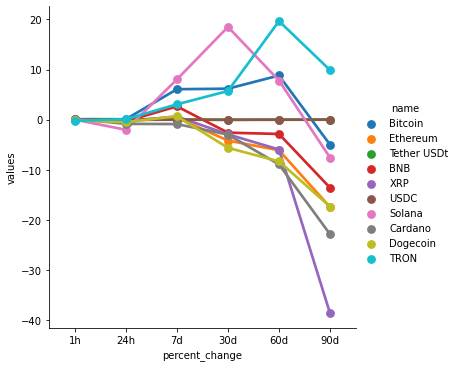

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [21]:
# gettin required data from raw data for another visualization

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 26, Finished, Available)

,name,quote.USD.price,timestamp
0,Bitcoin,28379.31993,2023-10-19 01:28:44.812276
0,Bitcoin,28379.31993,2023-10-19 01:28:57.443917
0,Bitcoin,28384.82903,2023-10-19 01:29:57.936356
0,Bitcoin,28390.94912,2023-10-19 01:30:58.253991
0,Bitcoin,28393.28300,2023-10-19 01:31:58.652658
0,Bitcoin,28385.30820,2023-10-19 01:32:59.517734
0,Bitcoin,28383.77771,2023-10-19 01:33:59.937082


StatementMeta(3a48cab6-14d7-4197-8a6c-030cdba9ac7c, 2, 27, Finished, Available)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

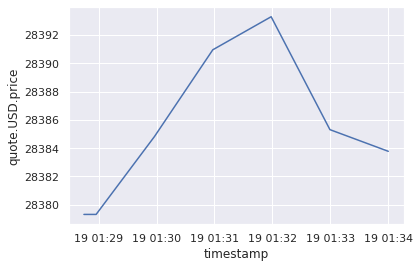

In [22]:
#Visualising Data

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

 

